In [30]:
# Selected sites: [[8, 47], [24, 21], [19, 27], [3, 17], [6, 30]]
# Non selected sites [[48, 13], [15, 29], [0, 3], [21, 24], [5, 19]]
# Covered points: [[9, 43], [5, 49], [25, 23], [23, 29], [2, 19], [4, 31]]
# Non covered points: [[21, 16], [43, 25], [12, 11], [3, 36], [0, 42], [18, 3], [19, 47], [16, 18], [47, 27], [30, 15], 
# [24, 10], [34, 13], [31, 0], [37, 45], [42, 6], [14, 24], [10, 2], [27, 28], [29, 14], [13, 40], [11, 32], [20, 9], [7, 12], 
# [45, 48], [17, 39], [22, 8], [36, 7], [6, 41], [39, 34], [41, 26], [28, 4], [33, 21], [1, 37], [32, 20]]
# Objective function: 6

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter
from numpy.random import default_rng


demand_points = [[33, 0], [28, 33], [26, 28], [3, 29], [8, 30], [10, 35], [7, 32], [15, 1],
[39, 20], [48, 31], [25, 37], [30, 36], [41, 48], [23, 22], [31, 4], [11, 8], [32, 14], [46, 17], 
[6, 3], [9, 5], [45, 44], [49, 45], [2, 15], [14, 26], [18, 11], [24, 13], [16, 38], [5, 21], [44, 42], 
[4, 2], [34, 39], [22, 49], [13, 46], [38, 47], [1, 12], [29, 27], [43, 25], [21, 43], [40, 16], [42, 34]]

candidate_sites = [[36, 3], [24, 31], [7, 26], [9, 32], [16, 1], [4, 41], [28, 44], [31, 2], [33, 11], [0, 14]]

non_covered_points = list(demand_points)
covered_points = []

selected_sites = [[36, 3], [24, 31], [7, 26], [9, 32], [16, 1]]
non_selected_sites = [[4, 41], [28, 44], [31, 2], [33, 11], [0, 14]]
new_selected_sites = []
individual_covered = [[[36, 3], 1], [[24, 31], 2], [[7, 26], 2], [[9, 32], 2], [[16, 1], 1]]
prev_objective_function = 8
sf = 5
r = 5
new_of = 0
completed = True

title = "p = " + str(50) + " f = " + str(10) + " sf = " + str(sf) + " r  =" + str(r)

In [31]:
def addCirclesToPlot(d_points, cs_points, selected_points, of):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if 50 >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    for point in selected_points:
        circle = plt.Circle((point[0], point[1]), r, color='blue', fill=False)
        ax.add_patch(circle)
    plt.xlabel('Objective Function: ' + str(of))
    plt.savefig("secondg.jpg")
    plt.show()

Selected sites: [[7, 26], [9, 32], [16, 1], [31, 2], [0, 14]]
Non selected sites: [[4, 41], [28, 44], [33, 11], [36, 3], [24, 31]]
Covered points: [[33, 0], [31, 4], [32, 14], [2, 15], [1, 12], [28, 33], [26, 28]]
Non covered points: [[3, 29], [8, 30], [10, 35], [7, 32], [15, 1], [39, 20], [48, 31], [25, 37], [30, 36], [41, 48], [23, 22], [11, 8], [46, 17], [6, 3], [9, 5], [45, 44], [49, 45], [14, 26], [18, 11], [24, 13], [16, 38], [5, 21], [44, 42], [4, 2], [34, 39], [22, 49], [13, 46], [38, 47], [29, 27], [43, 25], [21, 43], [40, 16], [42, 34]]
Objective function: 5
Number of points covered by every site: [[[36, 3], 1], [[24, 31], 2], [[7, 26], 2], [[9, 32], 2], [[16, 1], 1]]


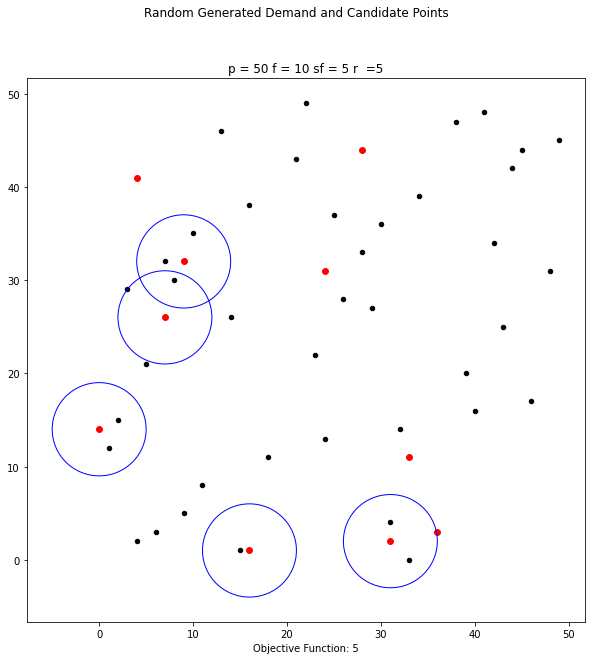

New SELECTED SITES: [[31, 2], [0, 14]]


In [32]:
for x in range(sf):
    for selected in individual_covered:
        if len(new_selected_sites)>=sf:
            completed = False
        count = 0
        for no_selected in non_selected_sites:
            for point in non_covered_points:
                d = sqrt((point[0] - no_selected[0]) ** 2 + (no_selected[1] - point[1]) ** 2)
                if d <= r and completed:
                    covered_points.append(point)
                    non_covered_points.remove(point)
                    count += 1
            if count > selected[1] and completed:
                non_selected_sites.append(selected[0])
                selected_sites.remove(selected[0])
                selected_sites.append(no_selected)
                new_selected_sites.append(no_selected)
                non_selected_sites.remove(no_selected)
                new_of += count
                break


print("Selected sites:", selected_sites)
print("Non selected sites:", non_selected_sites)
print("Covered points:", covered_points)
print("Non covered points:", non_covered_points)
print("Objective function:", new_of)
print("Number of points covered by every site:", individual_covered)
addCirclesToPlot(demand_points, candidate_sites, selected_sites, new_of)
print("New SELECTED SITES:", new_selected_sites)